2025-12-08 23:32:05.261227: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-08 23:32:05.479630: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-08 23:32:07.999532: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 14s 1us/step


2025-12-08 23:32:28.258002: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

Training the Denoising Autoencoder...


2025-12-08 23:32:28.636186: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 188160000 exceeds 10% of free system memory.
2025-12-08 23:32:28.894899: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0689 - val_loss: 0.0470
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0409 - val_loss: 0.0365
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0342 - val_loss: 0.0315
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 0.0305 - val_loss: 0.0289
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0283 - val_loss: 0.0270
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0268 - val_loss: 0.0259
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0257 - val_loss: 0.0251
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0247 - val_loss: 0.0241
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0239 - val_loss: 0.0233
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0231 - val_loss: 0.0230
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0225 - val_loss: 0.0223
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s

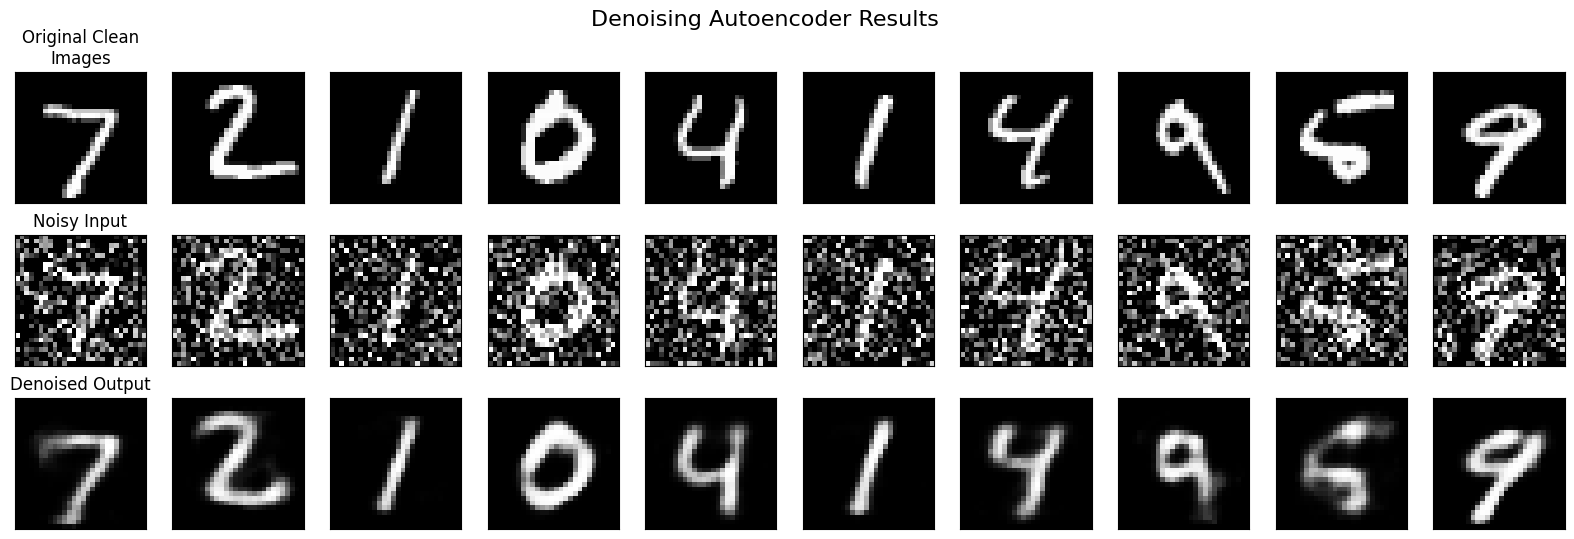

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np


(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the 28x28 images into 784-dimensional vectors
original_dim = 784
x_train = x_train.reshape((len(x_train), original_dim))
x_test = x_test.reshape((len(x_test), original_dim))

noise_factor = 0.5  # How much noise to add

x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)


encoding_dim = 32

input_img = Input(shape=(original_dim,))

encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(original_dim, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.summary()

print("Training the Denoising Autoencoder...")

autoencoder.fit(x_train_noisy, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))


decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10  # Number of digits to display
plt.figure(figsize=(20, 6))
plt.suptitle("Denoising Autoencoder Results", fontsize=16)

for i in range(n):
    # --- Display original images (for comparison) ---
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        ax.set_title("Original Clean\nImages", fontsize=12)

    # --- Display noisy input images ---
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        ax.set_title("Noisy Input", fontsize=12)

    # --- Display reconstructed (denoised) images ---
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        ax.set_title("Denoised Output", fontsize=12)

plt.show()